# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | allapalli
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | ovria
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | xilin hot
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | usogorsk
Processing Record 10 of Set 1 | prescott
Processing Record 11 of Set 1 | kongsberg
Processing Record 12 of Set 1 | sibiti
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | slaton
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | langepas
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | carutapera
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | pelabuhanratu
Processing Record 22 of Set 1 | kodiak
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,allapalli,19.4167,80.0667,21.56,85,88,0.27,IN,1701291299
1,portland,45.5234,-122.6762,6.99,67,75,1.54,US,1701291219
2,ovria,38.1833,21.7167,17.29,81,93,2.72,GR,1701291300
3,laguna,38.4210,-121.4238,17.88,47,100,3.09,US,1701291300
4,hamilton,39.1834,-84.5333,8.83,52,0,7.20,US,1701291300


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,21.56,85,88,0.27,IN,1701291299
1,portland,45.5234,-122.6762,6.99,67,75,1.54,US,1701291219
2,ovria,38.1833,21.7167,17.29,81,93,2.72,GR,1701291300
3,laguna,38.4210,-121.4238,17.88,47,100,3.09,US,1701291300
4,hamilton,39.1834,-84.5333,8.83,52,0,7.20,US,1701291300


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

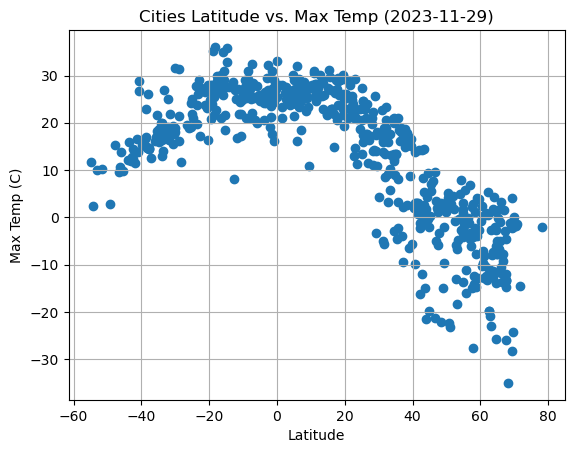

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Max Temp (%s)' % time.strftime("%Y-%m-%d"))
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

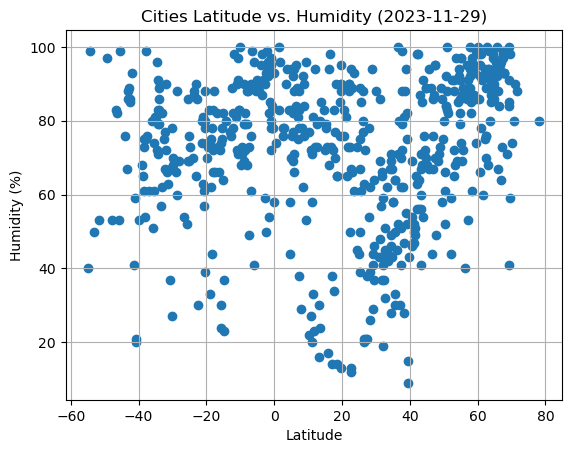

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title('Cities Latitude vs. Humidity (%s)' % time.strftime("%Y-%m-%d"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

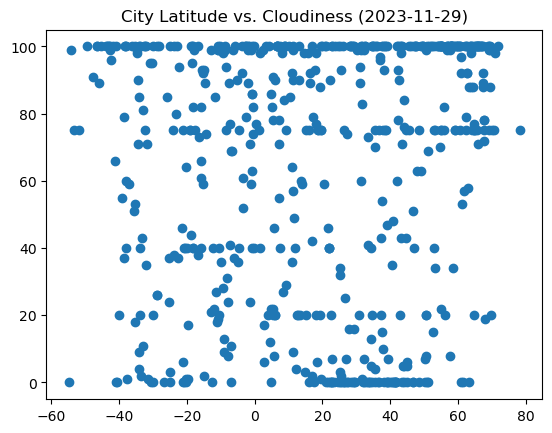

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%Y-%m-%d'))
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

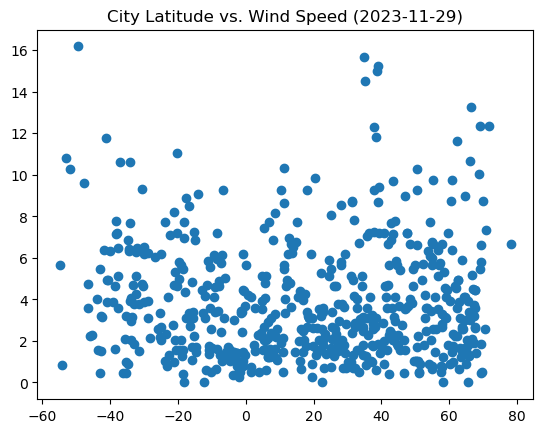

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%Y-%m-%d'))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_line_regress(x_values, y_values,title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allapalli,19.4167,80.0667,21.56,85,88,0.27,IN,1701291299
1,portland,45.5234,-122.6762,6.99,67,75,1.54,US,1701291219
2,ovria,38.1833,21.7167,17.29,81,93,2.72,GR,1701291300
3,laguna,38.4210,-121.4238,17.88,47,100,3.09,US,1701291300
4,hamilton,39.1834,-84.5333,8.83,52,0,7.20,US,1701291300


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,nabire,-3.3667,135.4833,24.18,91,52,1.47,ID,1701291300
7,edinburgh of the seven seas,-37.0676,-12.3116,12.58,61,59,10.62,SH,1701291301
11,sibiti,-3.6819,13.3499,20.60,98,92,0.37,CG,1701291302
12,east london,-33.0153,27.9116,17.96,62,11,1.86,ZA,1701291303
16,port mathurin,-19.6833,63.4167,24.92,70,1,4.96,MU,1701291305


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7322468173654432


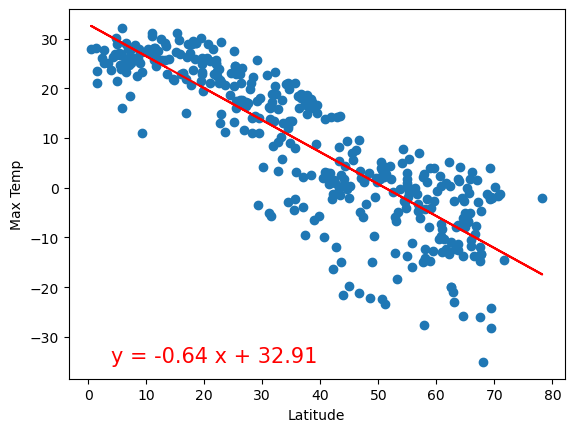

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']

plot_line_regress(x_values, y_values, 'Max Temp', (4,-35))

The r-value is: 0.45406940438868215


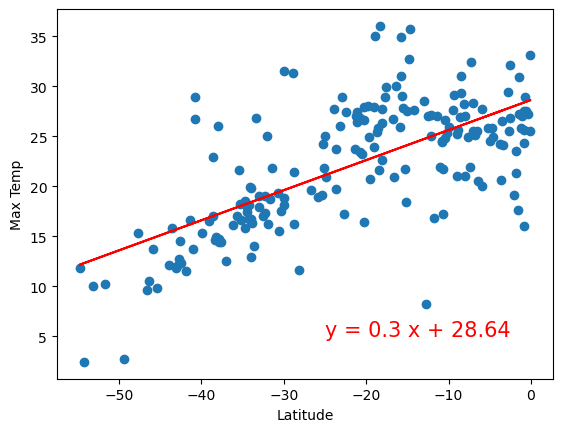

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_line_regress(x_values, y_values, 'Max Temp', (-25,5))

**Discussion about the linear relationship:** The r value of 0.7322468173654432 for the Northern Hemisphere suggests a good correlation. However, in the Southern Hempishere's r value of 0.45406940438868215 shows that there isn't a strong correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09242762225373138


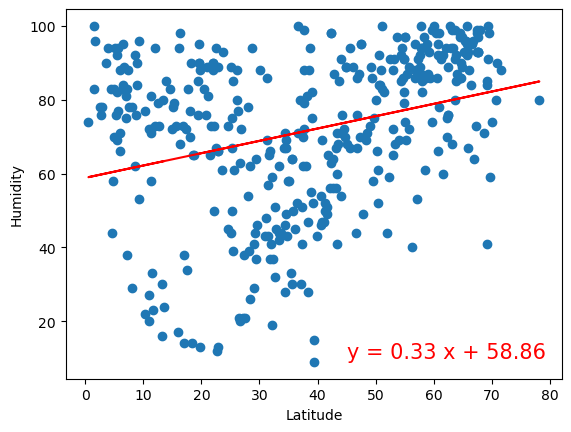

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Humidity']
plot_line_regress(x_values,y_values, 'Humidity', (45,10))

The r-value is: 0.04852271388237836


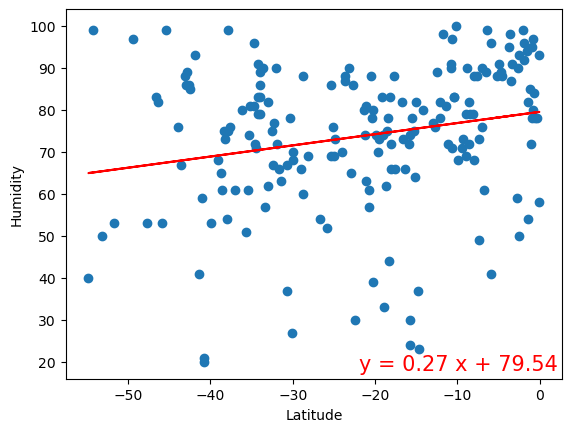

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Humidity']
plot_line_regress(x_values,y_values, 'Humidity', (-22, 18))

**Discussion about the linear relationship:** The low r value shows us that in both the Nothern and Southern Hemispheres, there is not a strong correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05349251076343177


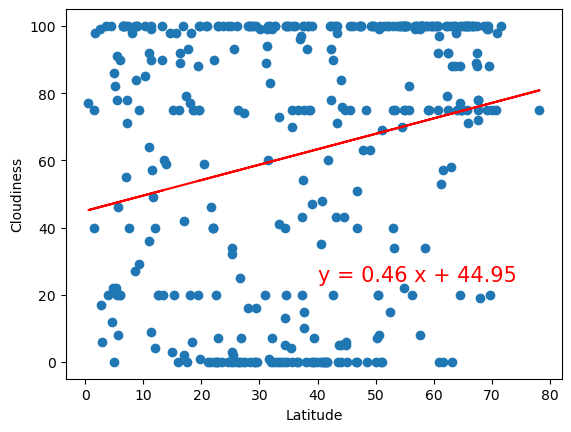

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Cloudiness']
plot_line_regress(x_values,y_values, 'Cloudiness', (40,24))

The r-value is: 0.0006670119094538096


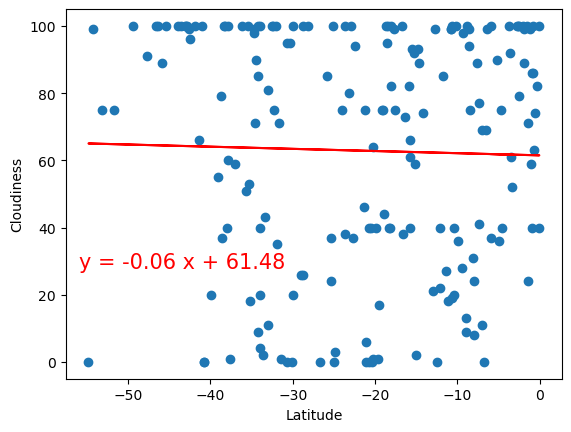

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Cloudiness']
plot_line_regress(x_values,y_values, 'Cloudiness', (-56, 28))

**Discussion about the linear relationship:** The low r value shows us that in both the Nothern and Southern Hemispheres, there is not a strong correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011410550146429851


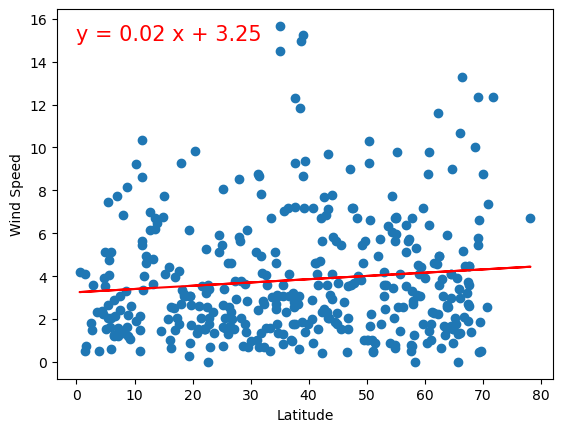

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Wind Speed']
plot_line_regress(x_values,y_values, 'Wind Speed', (0,15))

The r-value is: 0.11078668558325824


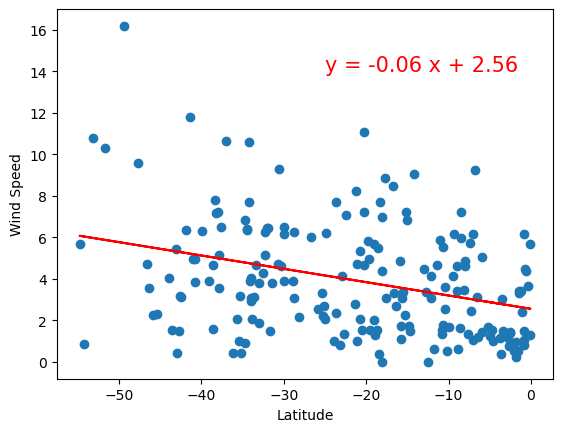

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Wind Speed']
plot_line_regress(x_values,y_values, 'Wind Speed', (-25, 14))

**Discussion about the linear relationship:** The low r value shows us that in both the Nothern and Southern Hemispheres, there is not a strong correlation between latitude and wind speed. 